# Motor Notebook

Scaling laws study the effect of varying representative parameters of a component compared with a known reference.
>*Budinger, M., Reysset, A., Halabi, T. E., Vasiliu, C., & Mare, J. C. (2014). Optimal preliminary design of electromechanical actuators. Proceedings of the Institution of Mechanical Engineers, Part G: Journal of Aerospace Engineering, 228(9), 1598-1616.

In this section we are going to see the distribution of three important parameters in function of the torque. Scaling laws permit us to modelize the behavior of one parameter by using one reference component.
Forward, we will see how accurate is the scaling law model to our data measured by plotting this dependance in a graphic and by calculating the $R^2$ of our model with respect to the extracted data. 
As we can advance, the values of $R^2$ will be near to 1 corroborating the model.

## Important scaling laws

- Mass: $M^*= M_{ref}\cdot T^{*3/3.5}$ where $T^*=\frac{T_i}{T_{ref}}$
- Friction torque: $C_f=C_{f_{ref}} \cdot T^{*3/3.5}$
- Resistance: $R^*=R_{ref}\cdot K_T^{*2}\cdot T^{*-5/3.5}$ where $K_T^*=\frac{K_{T_i}}{K_{T_{ref}}}$

## Import Data

In [1]:
# reference values for each model
M_mot_ref_AXI=57 #[g]
T_mot_ref_AXI=0.102#[Nm]
Cf_mot_ref_AXI= 0.00588 #[N.m]
R_mot_ref_AXI= 0.045 #[Ohms]
K_mot_ref_AXI=0.0049#[N.m/A]

M_mot_ref_KDE=305 #[g]
T_mot_ref_KDE=1.794#[Nm]
Cf_mot_ref_KDE=0.020256 #[N.m]
R_mot_ref_KDE= 0.044 #[Ohms]
K_mot_ref_KDE=0.02893#[N.m/A]


M_mot_ref_SCO=435 #[g]
T_mot_ref_SCO=1.84#[Nm]
Cf_mot_ref_SCO=0.04080154 #[N.m]
R_mot_ref_SCO=0.031 #[Ohms]
K_mot_ref_SCO=0.02893726#[N.m/A]

R_mot_ref_maxon=0.149#[ohms]
K_mot_ref_maxon=0.0427#[N.m/A]
M_mot_ref_maxon=1150#[g]
T_mot_ref_maxon=0.316#[Nm]
Cf_mot_ref_maxon=0.0280112 #[N.m]


In [2]:
Mass_Motors=[M_mot_ref_AXI,M_mot_ref_KDE,M_mot_ref_SCO,M_mot_ref_maxon]
T_Motors=[T_mot_ref_AXI,T_mot_ref_KDE,T_mot_ref_SCO,T_mot_ref_maxon]
Cf_motors=[Cf_mot_ref_AXI,Cf_mot_ref_KDE,Cf_mot_ref_SCO,Cf_mot_ref_maxon]
R_motors=[R_mot_ref_AXI,R_mot_ref_KDE,R_mot_ref_SCO,R_mot_ref_maxon]
K_motors=[K_mot_ref_AXI,K_mot_ref_KDE,K_mot_ref_SCO,K_mot_ref_maxon]

Tvector=[]
Mvector=[]
Cfvector=[]
Kvector=[]
Rvector=[]


## 1. M vs T

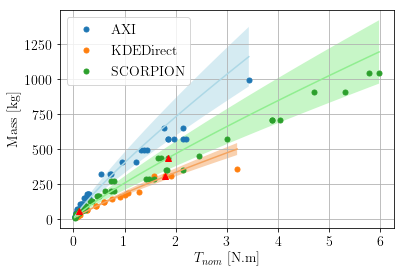

In [228]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

path='./Data/'
df = pd.read_csv(path+'MotorFamilies.csv',sep=';',encoding = 'unicode_escape')


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#df=qgrid_widget.get_changed_df()
df=df[(df['TYPE'] == 'AXI') | (df['TYPE'] == 'KDEDirect') |(df['TYPE'] == 'SCORPION')]
groups = df.groupby('TYPE')

Tvector=[]

color=['lightblue',  'sandybrown','lightgreen']
std=[0.1831,0.0854,0.1893]


for name, group in groups:
    T=np.linspace(group.Tnom_Nm.min(),group.Tnom_Nm.max())
    Tvector.append(T)
    plt.plot(group.Tnom_Nm, group.weight_g, marker='o', linestyle='', ms=5, 
label=name)
#print(Tvector)

i=0
for A,B,C in zip (Mass_Motors, T_Motors,Tvector):
    M=A*(C/B)**(3/3.5)
    plt.plot(C, M,color=color[i])    
    plt.fill_between(C, (1+std[i])*M, (1-std[i])*M, facecolor=color[i], alpha=0.5)
    i=i+1

plt.plot(T_mot_ref_AXI,M_mot_ref_AXI, '^r')
plt.plot(T_mot_ref_KDE,M_mot_ref_KDE, '^r')
plt.plot(T_mot_ref_SCO,M_mot_ref_SCO, '^r')



#Here we plot
#Labelling
#ax1.loglog()
plt.grid(True,which="both",ls="-")
plt.legend(fontsize=14)
#ax1.set_title('Cf vs Torque ', fontsize=14)
plt.xlabel(r'$T_{nom}$ [N.m]', fontsize=14)
plt.ylabel('Mass [kg]', fontsize=14)

plt.tick_params(axis = 'both', labelsize = 14)

plt.savefig('M_T.pdf',dpi=1200,format='pdf')

## 2. Cf vs T

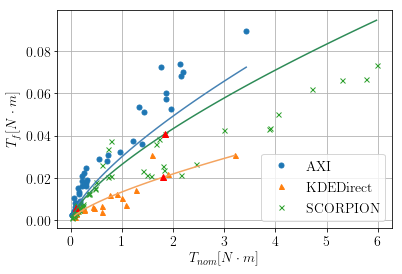

In [12]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as mp
import pandas as pd
import numpy as np

path='./Data/'
df = pd.read_csv(path+'MotorFamilies.csv',sep=';',encoding = 'unicode_escape')



plt.rc('text', usetex=True)
plt.rc('font', family='serif')


#df=qgrid_widget.get_changed_df()
df=df[(df['TYPE'] == 'AXI') | (df['TYPE'] == 'SCORPION') | (df['TYPE'] == 'KDEDirect') ]
groups = df.groupby('TYPE')

Tvector=[]

color=['steelblue',  'sandybrown','seagreen']
std=[0.238,0.267,0.33]

i=0
marcador=['o', '^', 'x']
for name, group in groups:
    T=np.linspace(group.Tnom_Nm.min(),group.Tnom_Nm.max())
    Tvector.append(T)
    plt.plot(group.Tnom_Nm, group.Cf_Nm, marker=marcador[i], linestyle='', ms=5, 
label=name)
    i=i+1
    
i=0
for A,B,C,D in zip (Cf_motors, T_Motors,Tvector,Mass_Motors):
    Cf=A*(C/B)**(2.5/3.5)
    plt.plot(C, Cf, color=color[i])    
    plt.plot(B,A,'^r')
    #plt.fill_between(C, (1+std[i])*Cf, (1-std[i])*Cf, facecolor=color[i], alpha=0.5)

    i=i+1

#Here we plot
#Labelling
#ax1.loglog()
plt.grid(True,which="both",ls="-")
plt.legend(fontsize=14)
#ax1.set_title('Cf vs Torque ', fontsize=14)
plt.xlabel(r'$T_{nom} [N\cdot m]$', fontsize=14)
plt.ylabel(r'$T_{f} [N\cdot m]$', fontsize=14)

plt.tick_params(axis = 'both', labelsize = 14)
#plt.loglog()

plt.savefig('Cf_T.pdf',dpi=1200,format='pdf')

LOG

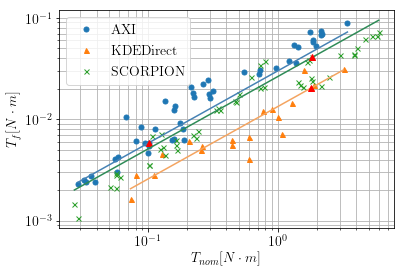

In [9]:
from matplotlib import pyplot as plt
from matplotlib import pyplot as mp
import pandas as pd
import numpy as np

path='./Data/'
df = pd.read_csv(path+'MotorFamilies.csv',sep=';',encoding = 'unicode_escape')



plt.rc('text', usetex=True)
plt.rc('font', family='serif')


#df=qgrid_widget.get_changed_df()
df=df[(df['TYPE'] == 'AXI') | (df['TYPE'] == 'SCORPION') | (df['TYPE'] == 'KDEDirect') ]
groups = df.groupby('TYPE')

Tvector=[]

color=['steelblue',  'sandybrown','seagreen']
std=[0.238,0.267,0.33]

i=0
marcador=['o', '^', 'x']
for name, group in groups:
    T=np.linspace(group.Tnom_Nm.min(),group.Tnom_Nm.max())
    Tvector.append(T)
    plt.plot(group.Tnom_Nm, group.Cf_Nm, marker=marcador[i], linestyle='', ms=5, 
label=name)
    i=i+1
    
i=0
for A,B,C,D in zip (Cf_motors, T_Motors,Tvector,Mass_Motors):
    Cf=A*(C/B)**(2.5/3.5)
    plt.plot(C, Cf, color=color[i])    
    plt.plot(B,A,'^r')
    #plt.fill_between(C, (1+std[i])*Cf, (1-std[i])*Cf, facecolor=color[i], alpha=0.5)

    i=i+1

#Here we plot
#Labelling
#ax1.loglog()
plt.grid(True,which="both",ls="-")
plt.legend(fontsize=14)
#ax1.set_title('Cf vs Torque ', fontsize=14)
plt.xlabel(r'$T_{nom} [N\cdot m]$', fontsize=14)
plt.ylabel(r'$T_{f} [N\cdot m]$', fontsize=14)

plt.tick_params(axis = 'both', labelsize = 14)
plt.loglog()

plt.savefig('Cf_T_LOG.pdf',dpi=1200,format='pdf')

RESISTANCE

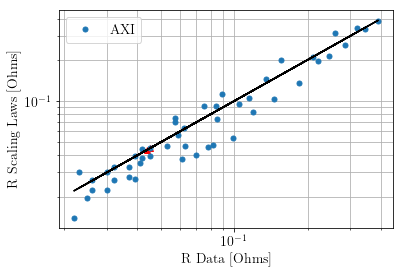

In [264]:
import pandas as pd
from matplotlib import pyplot as plt

path='./Data/'
df = pd.read_csv(path+'MotorFamilies.csv',sep=';',encoding = 'unicode_escape')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

df=df[(df['TYPE'] == 'AXI') | (df['TYPE'] == 'SCORPION') ]

groups = df.groupby('TYPE')


T2=df['Tnom_Nm'].values
K2=df['Kt_Nm_A'].values
R2=df['r_omn'].values


Pro=[]
R_Vector=[]
RES=[]
Name=[]

for name, group in groups:
    Product=(group.Tnom_Nm)**(-5/3.5)*group.Kt_Nm_A**2
    Pro.append(Product)
    Name.append(name)

#print (Name)
for A,B,C,D in zip (R_motors, T_Motors,K_motors,Pro):
    R=D*A/(B**(-5/3.5))/(C**2)
    R_Vector.append(R)
    plt.plot(A,A,'^r')

#print(len(R_Vector))
for name, group in groups:
    RES.append(group.r_omn)

#print((RES))
i=0

for i in range(len(RES)-1):
        plt.plot(RES[i], R_Vector[i], marker='o', linestyle='', ms=5, 
    label=Name[i])
        plt.plot(RES[i], RES[i], '-k',label='_nolegend')
        
plt.grid(True,which="both",ls="-")
#plt.loglog()
plt.legend(fontsize=14)
plt
#ax1.set_title('R data vs R Scaling Laws ')
plt.xlabel('R Data [Ohms]', fontsize=14)
plt.ylabel('R Scaling Laws [Ohms]', fontsize=14)
plt.tick_params(axis = 'both', labelsize = 14)
#plt.savefig('RDataRSL.pdf',dpi=1200,format='pdf')
#mp.savefig('RDataRSL.pdf',dpi=1200,format='pdf')

CALCULATION OF REFERENCE VALUES:

MASS

In [15]:
import pandas as pd
import statistics
import numpy as np

path='./Data/'
df = pd.read_csv(path+'MotorFamilies.csv',sep=';',encoding = 'unicode_escape')
ref_count=-1
value_count=0


n=1e15
df=df.loc[df['TYPE'] == 'SCORPION']
df = df.reset_index(drop=True)

for index, row in df.iterrows():
    allerr=[]#list of relative errors
    allmass=[]#list of all estimation masses
    value_count=0
    ref_count+=1
    for index, row in df.iterrows():
        M_SL=df.at[ref_count,'weight_g']*(df.at[value_count,'Tnom_Nm']/df.at[ref_count,'Tnom_Nm'])**(3/3.5)#estimation mass
        allmass.append(M_SL)#append all estimation masses
        ER=abs(M_SL-df.at[value_count,'weight_g'])/(df.at[value_count,'weight_g'])#relative error per row
        allerr.append(ER)#append all relative errors
        MEANER=np.mean(allerr)# mean of allerr
        value_count+=1
    if MEANER<n:
        n=MEANER
        M=df.at[ref_count,'weight_g']
        Tnom=df.at[ref_count,'Tnom_Nm']
        Cf=df.at[ref_count,'Cf_Nm']   
        R=df.at[ref_count,'r_omn']   
        K=df.at[ref_count,'Cf_Nm']   
        coefficient_of_dermination = r2_score(df['weight_g'], allmass)       
        sigma=statistics.stdev(allerr)

In [16]:
M,sigma,Tnom,Cf,n,R,K,coefficient_of_dermination

(435.0,
 0.10074074132891193,
 1.84,
 0.04080154,
 0.18938184406952266,
 0.031,
 0.04080154,
 0.9461793271397728)

MAXIMUM TORQUE

In [17]:
import pandas as pd
import statistics
import numpy as np
from sklearn.metrics import r2_score


path='./Data/'
df = pd.read_csv(path+'MotorFamilies.csv',sep=';',encoding = 'unicode_escape')
ref_count=-1
value_count=0


n=1e15
df=df.loc[df['TYPE'] == 'KDEDirect']
df = df.reset_index(drop=True)

for index, row in df.iterrows():
    allcf=[]
    allfriction=[]
    value_count=0
    ref_count+=1
    for index, row in df.iterrows():
        Tf_SL=df.at[ref_count,'Cf_Nm']*(df.at[value_count,'Tnom_Nm']/df.at[ref_count,'Tnom_Nm'])**(2.5/3.5)#estimation mass
        allfriction.append(Tf_SL)#all friction torques
        ER=abs(Tf_SL-df.at[value_count,'Cf_Nm'])/(df.at[value_count,'Cf_Nm'])#relative error per row
        allcf.append(ER)#all relative errors
        MEAN=(np.mean(allcf))#mean relative error
        value_count+=1
    if MEAN<n:
        n=MEAN
        Cf=df.at[ref_count,'Cf_Nm']        
        M=df.at[ref_count,'weight_g']
        Tnom=df.at[ref_count,'Tnom_Nm']
        sigma=statistics.stdev(allcf)
        coefficient_of_dermination = r2_score(df['Cf_Nm'], allfriction)

In [18]:
M,sigma,Tnom,Cf,n,coefficient_of_dermination

(195.0,
 0.26489382715078647,
 1.273239545,
 0.014375285,
 0.25627832446815135,
 0.8072682913757834)